In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# from LabToolbox.utils import PrintResult, histogram, analyze_residuals
# from LabToolbox.fit import lin_fit, model_fit
# from LabToolbox.uncertainty import propagate_uncertainty

import LabToolbox as lab

%config InlineBackend.figure_formats = ['svg'] # <-- Qualità 'svg' dei plot.

`PrintResult`

In [3]:
x = 1.264382
sigmax = 0.357

# The sample data represent the measured current (in amperes) in a circuit along with the associated uncertainty.
# However, these are not correctly formatted.

In [4]:
lab.PrintResult(x, sigmax, name = "Current", unit= "A")

# This function allows you to print the correctly formatted value (with sigma having two significant digits).
# The relative uncertainty of the measurement is shown in square brackets.
# Further descriptions of the `histogram` variables are available by hovering the cursor over the function itself.

Current = (1.26 ± 0.36) A [28.57%]


`histogram`

In [5]:
np.random.seed(0)
x = np.random.normal(100, 7, size = (50))

# The generated data can represent, for example, the mass values of an apple (in grams) measured with a scale.
# This type of measurements follows a Gaussian distribution.

Mean value: 101.0 g
Standard deviation: 8.0 g
Skewness: -0.13
Kurtosis: -0.59
p-value: 88%

The data are consistent with a normal distribution.


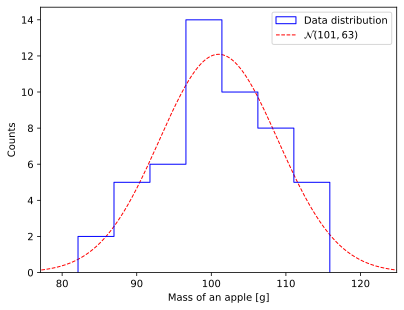

In [6]:
_, _, _, _, _ = lab.histogram(x, x.std(), unit = "g", label = "Mass of an apple")

# This function constructs a histogram of occurrences for a given variable.
# The number of bins for the histogram is automatically calculated by the function.
# A Gaussian with parameter μ = x.mean() and σ = sigmax will be overlaid on the histogram.
# Further descriptions of the `histogram` variables are available by hovering the cursor over the function itself.

`analyze_residuals`

Mean value: 0.2
Standard deviation: 2.9
Skewness: -0.00
Kurtosis: -2.23
p-value: 93%
Durbin-Watson statistic: 1.768

Residuals are consistent with a normal distribution.
Residuals do not show significant autocorrelation.


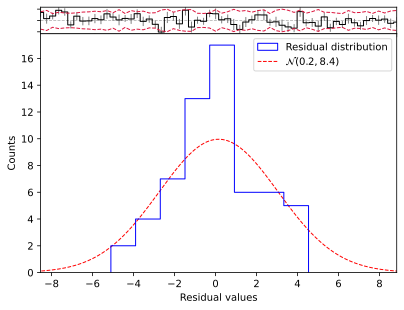

In [7]:
# Example data generation
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 60)  # 20 equally spaced points between 0 and 10
y = 2.5 * x + 1.5 + np.random.normal(0, 2, size=x.shape)  # sample data

np.random.seed(1)
sy = np.random.uniform(1.5, 2.5, size=len(y))  # Uncertainties between ±1.5 and ±2.5

_, _, _, _, _, _ = lab.analyze_residuals(y, 2.5*x + 1.5, sy)

`lin_fit`

In [8]:
# Example data generation
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 20)  # 20 equally spaced points between 0 and 10
y = 2.5 * x + 1.5 + np.random.normal(0, 2, size=x.shape)  # sample data

np.random.seed(1)
sy = np.random.uniform(1.5, 2.5, size=len(y))  # Uncertainties between ±1.5 and ±2.5

χ²/dof = 0.85
p-value = 64%
80% of the residuals lie within ±2σ of zero.


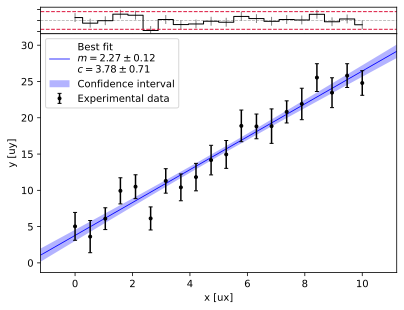

In [9]:
m, c, sigma_m, sigma_c, chi2_red, p_value = lab.lin_fit(x = x, y = y, sy = sy, sx = None, fitmodel = "wls", residuals = True)

# This function performs a linear fit on y(x). If `residuals = True`, a panel with normalized residuals appears above the fit.
# The black line shows the normalized residual values, while the grey band indicates a ±1 error range.
# The dashed red lines represent the confidence interval [-2, +2].
# Further descriptions of the `lin_fit` variables are available by hovering the cursor over the function itself.

`model_fit`

In [10]:
# Example data generation for model_fit
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 10, 20)  # 20 equally spaced points between 0 and 10
y = np.sin(2*x) + 1.5 + np.random.normal(0, 2, size=x.shape)  # sample data

np.random.seed(1)
sy = np.random.uniform(1, 2, size=len(y))  # Uncertainties between ±1 and ±2

Parameter 1 = (1.150 +/- 0.083) [7.18%]
Parameter 2 = (2.66 +/- 0.30) [11.20%]
χ²/dof = 1.53
p-value = 7.00%
70% of the residuals lie within ±2σ of zero.


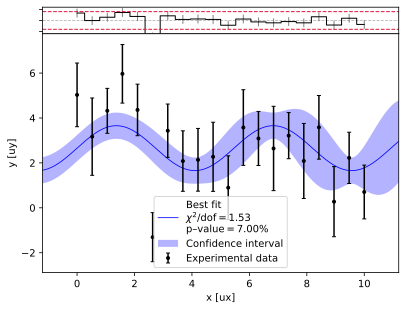

In [11]:
def model_function(x, a, b):
    return np.sin(a * x) + b

# Defined the model function for fitting the data.
# 'a' and 'b' are free parameters and should follow the independent variable in the function signature.
# The `model_fit` function estimates the parameters 'a' and 'b'.

popt, perr, chi2_red, p_value = lab.model_fit(x, y, sy, f = model_function, p0=[1, 2], residuals=True, norm=True)

# p0 is a list of initial guesses for the model parameters.
# The order of parameters in `p0` matches the order defined in `model_function`'s arguments.
# Further descriptions of the `model_fit` variables are available by hovering the cursor over the function itself.

`propagate_uncertainty`

In [12]:
np.random.seed(0)
h = np.random.normal(5, 0.25, size=10)
r = np.random.normal(7, 0.20, size=10)

np.random.seed(1)
sh = np.random.uniform(0.15, 0.25, size=len(h))  # Uncertainties between ±0.15 and ±0.25
sr = np.random.uniform(0.1, 0.3, size=len(h))    # Uncertainties between ±0.1 and ±0.3

V = np.pi * r**2 * h # measured volume of the cylinder

# We measured two variables (e.g., cylinder height and radius in cm) 10 times each, with uncertainties sh and sr respectively.
# The variable V is the cylinder volume (in cm^3).
# To propagate the uncertainties of h and r onto V, use the `propagate_uncertainty` function.

def volume(height, radius):
    return np.pi * radius**2 * height

# Defined the function to compute volume from radius and height.

V_value, sigma_V, _ = lab.propagate(func=volume, x_arrays=[h, r], uncertainties=[sh, sr], params=None)

# Further descriptions of the `propagate` variables are available by hovering the cursor over the function itself.

for i in range(len(V_value)):
    lab.PrintResult(V_value[i], sigma_V[i], name=f"Volume (measurement {i+1})", unit="cm^3")

Volume (measurement 1) = (844 ± 53) cm^3 [6.28%]
Volume (measurement 2) = (852 ± 67) cm^3 [7.86%]
Volume (measurement 3) = (843 ± 41) cm^3 [4.86%]
Volume (measurement 4) = (862 ± 73) cm^3 [8.47%]
Volume (measurement 5) = (863 ± 37) cm^3 [4.29%]
Volume (measurement 6) = (746 ± 55) cm^3 [7.37%]
Volume (measurement 7) = (877 ± 52) cm^3 [5.93%]
Volume (measurement 8) = (755 ± 54) cm^3 [7.15%]
Volume (measurement 9) = (779 ± 41) cm^3 [5.26%]
Volume (measurement 10) = (748 ± 43) cm^3 [5.75%]
